In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = 'https://raw.githubusercontent.com/alaevmt/project_abalone/main/abalone.csv'

In [3]:
df = pd.read_csv(dataset)

# Описание данных

## Abalone
**Predict the age of abalone from physical measurements**

`Sex` - nominal -  M, F, and I (infant)

`Length` - continuous - mm -  Longest shell measurement

`Diameter` -  continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried 

`Rings` - integer -  +1.5 gives the age in years (target)

В тёплых тропических и субтропических водах на побережье Калифорнии в США, а также на побережье Мексики можно встретить невзрачного на вид моллюска под названием галиотис или по простому - морское ушко. Эта брюхоногая улитка и правда напоминает человеческое ухо, вырастая как правило до 5-7 см в длину, изредка встречаются и особи побольше - до 35 см. Очень редко, в одном случае из 50-ти тысяч, в раковине моллюска галиотис находят причудливые жемчужины, получившие название Абалон.

In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(f'Размер датасета составляет {df.shape[0]} строк, {df.shape[1]} столбцов.')

Размер датасета составляет 4177 строк, 9 столбцов.


Проверим тип данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


В `Diameter`, `Shell weight ` и `Whole weight` есть пропущенные значения.

Выведим медиану по столбцу `Diameter`

In [7]:
median_diameter = df[~df['Diameter'].isnull()]['Diameter'].median()
median_diameter

0.425

Заменим пустые значения `Diameter` медианой

In [8]:
df['Diameter'].fillna(median_diameter, inplace=True)

Остальные сделаем по аналогии

In [9]:
median_Whole_weight = df[~df['Whole weight'].isnull()]['Whole weight'].median()
median_Whole_weight

0.7985

In [10]:
df['Whole weight'].fillna(median_Whole_weight, inplace=True)

In [11]:
median_Shell_weight = df[~df['Shell weight'].isnull()]['Shell weight'].median()
df['Shell weight'].fillna(median_Shell_weight, inplace=True)

Проверим, что пропущенных значений не осталось

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Проверим на дубли

In [13]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Посмотрим матрицу корреляции, сделаем выводы

<AxesSubplot:>

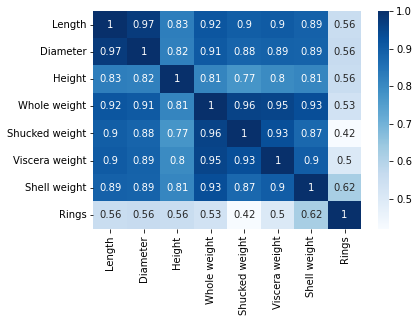

In [14]:
corr = df.corr()

sns.heatmap(corr, cmap='Blues', annot=True)

Корреляция по отношению к целевому признаку rings чуть выше среднего. Наибольшая корреляция у переменной Shell weight - 0.62. Наименьшая - Shucked weight - 0.42.

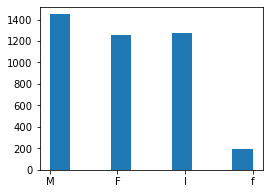

In [15]:
plt.figure(figsize=(4,3))

plt.hist(df.Sex);

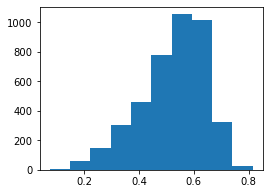

In [16]:
plt.figure(figsize=(4,3))

plt.hist(df.Length);

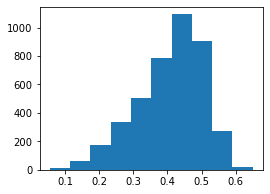

In [17]:
plt.figure(figsize=(4,3))

plt.hist(df.Diameter);

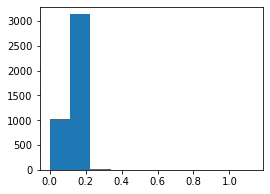

In [18]:
plt.figure(figsize=(4,3))

plt.hist(df.Height);

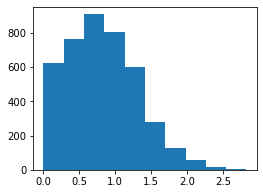

In [19]:
plt.figure(figsize=(4,3))

plt.hist(df['Whole weight']);

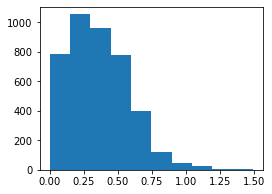

In [20]:
plt.figure(figsize=(4,3))

plt.hist(df['Shucked weight']);

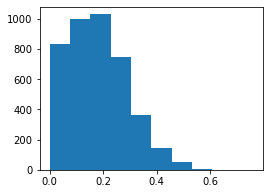

In [21]:
plt.figure(figsize=(4,3))

plt.hist(df['Viscera weight']);

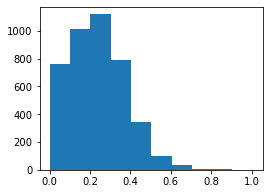

In [22]:
plt.figure(figsize=(4,3))

plt.hist(df['Shell weight']);

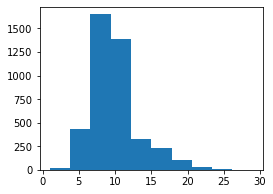

In [23]:
plt.figure(figsize=(4,3))

plt.hist(df['Rings']);

Прочитав описание датасета более подробно, пришел к выводу, что атрибут `Rings` необходим для подсчета возраста морского ушка. Возраст равен значению `Rings` + 1.5. Попробуем вывести возраст морского ушка. 

In [25]:
df['Age'] = df['Rings'] + 1.5
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Считаю, что атрибут `Rings` можно удалить.

In [26]:
df = df.drop('Rings', axis=1)
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Теперь будем считать, что целевой атрибут будет `Age`

In [28]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,11.433684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,9.500000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,10.500000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [29]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


Посмотрим на распределение `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

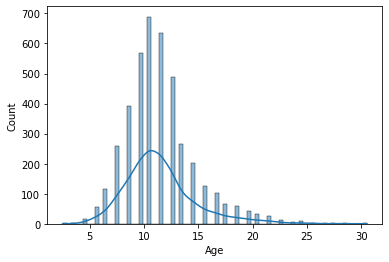

In [30]:
sns.histplot(data = df['Age'], kde = True)

Судя по распределнию (если я правильно понимаю - нормальное распред), у нас есть хвосты, которые значительно отличаются от большинства значений. Предполагаю, это может мешать при обучении модели.